<font color='darkblue'><h1><p style="text-align: center;"><strong>Project | ACCENT RECOGNITION</strong></p></h1></font>

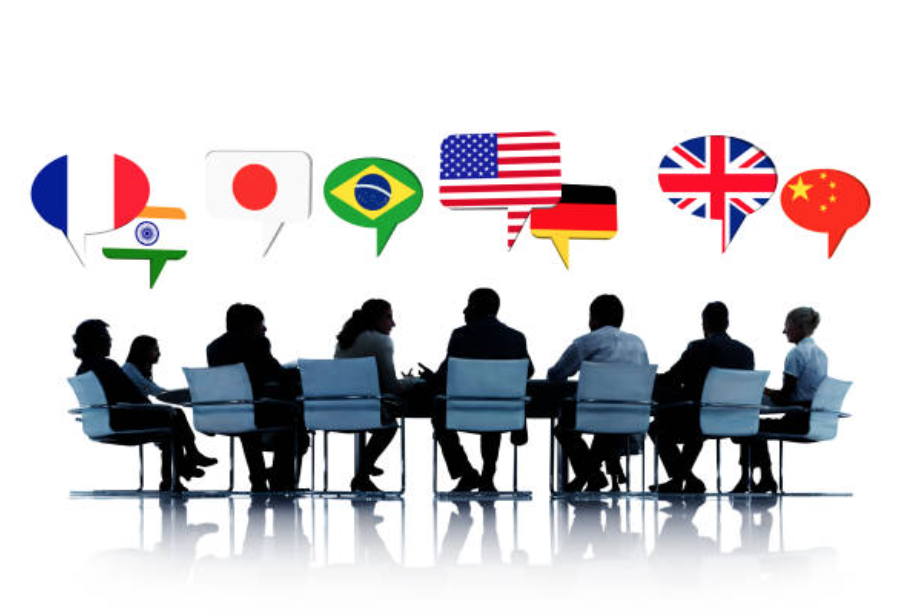

## <font color='DarkBlue'>0. <ins>Introduction</ins>: <font color='blue'></font>

<ins><strong>Objective: </strong></ins>

Native and non-native speakers of English read the same paragraph and are carefully transcribed.
<br>Our goal is to compare, analyze and predict the accents of different English speakers.

The elicitation <strong>paragraph</strong> is the following:

_"Please call Stella.  Ask her to bring these things with her from the store:  Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob.  We also need a small plastic snake and a big toy frog for the kids.  She can scoop these things into three red bags, and we will go meet her Wednesday at the train station."_

In [1]:
import IPython as ip
ip.display.Audio(r"https://accent.gmu.edu/soundtracks/french8.mp3")

<ins><strong>Sources: </strong></ins>

- The <strong><font color='purple'> Speech Accent Archive website</font></strong>:    https://accent.gmu.edu/
- The Kaggle <strong><font color='purple'>  Speech Accent Archive dataset</font></strong>:   https://www.kaggle.com/datasets/rtatman/speech-accent-archive
<br>_Weinberger, S. (2013). Speech accent archive. George Mason University_.
_Datasets distributed under a CC BY-NC-SA 2.0 license._

## <font color='DarkBlue'>I. <ins>Gathering DATA</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins>Retrieving data using Kaggle's API</ins>: <font color='violet'></font>

<ins><strong>Requirements: </strong></ins>

- Creating a new <strong>token</strong> from Kaggle <strong>account settings</strong> to get an <strong>API key</strong>.
- Setting up environment variables:<br>
>  <strong><font color='purple' size=2>KAGGLE_USERNAME</font></strong>='<font color='green'>your username</font>'<br>
>  <strong><font color='purple' size=2>KAGGLE_KEY</font></strong>='<font color='green'>your key</font>'

- Installing python <strong>kaggle</strong> & <strong>requests</strong> packages

In [ ]:
#!pip install kaggle requests

<ins><strong>Listing available dataset: </strong></ins>

In [ ]:
!kaggle datasets files rtatman/speech-accent-archive

<ins><strong>Downloading available files :</strong></ins> (_including the recordings_)

In [ ]:
 !kaggle datasets download rtatman/speech-accent-archive

In [ ]:
!ls -1 ../data/

<ins><strong>Capturing dataset informations: </strong></ins>

- Using API documentation from <font color='purple'>KaggleSwagger.yaml</font> file: 
https://github.com/Kaggle/kaggle-api/blob/main/KaggleSwagger.yaml
- Exploring Kaggle APIs with <font color='purple'>Swagger Editor</font>
 https://editor.swagger.io/

<table><tr>
<td> 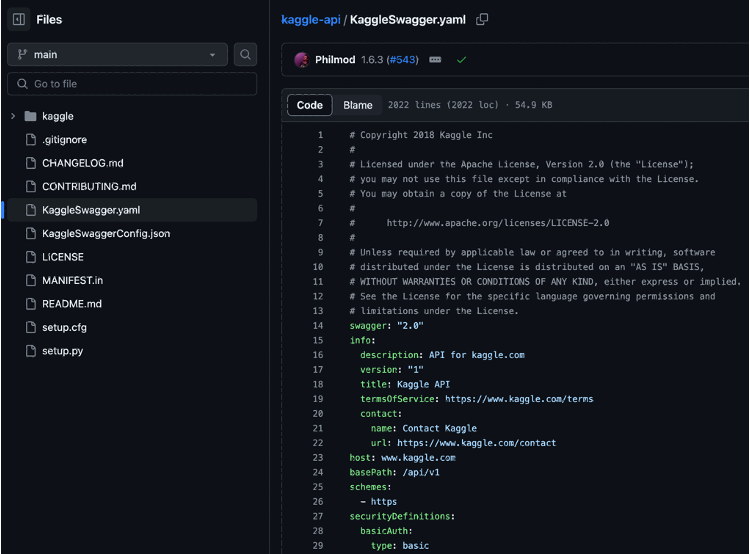 </td>
<td> 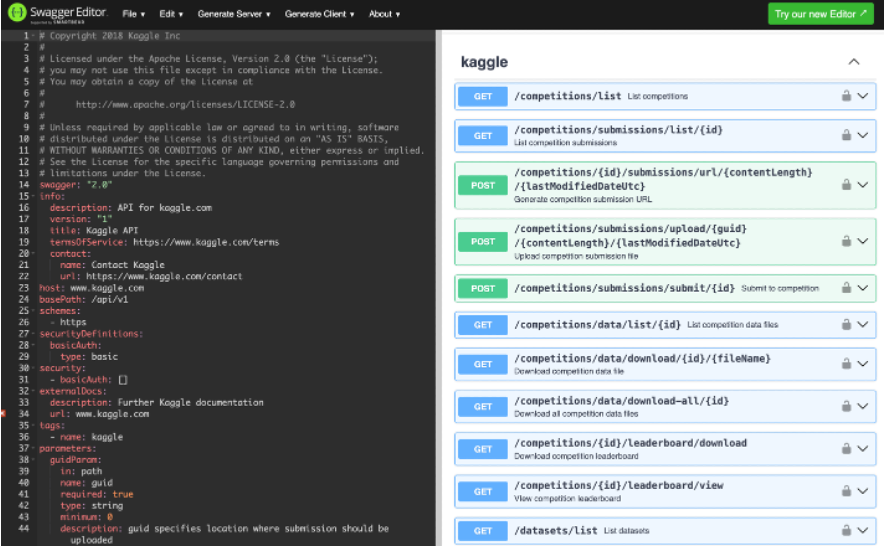 </td>
</tr></table>

<ins><strong>Searching for datasets :</strong></ins>

In [2]:
import requests
from requests.auth import HTTPBasicAuth
import os

url_kaggle='https://www.kaggle.com/api/v1/datasets/list?search=Speech+Accent+Archive'
response_json = requests.get(url_kaggle, auth=HTTPBasicAuth(username=os.getenv('KAGGLE_USERNAME'), password=os.getenv('KAGGLE_KEY'))).json()

for k in response_json: print(k['title'],'<=>',k['ref'])

Speech Accent Archive <=> rtatman/speech-accent-archive
English Multi-speaker Corpus for Voice Cloning <=> mfekadu/english-multispeaker-corpus-for-voice-cloning
speech-accent-archive <=> inf58250/test-dataset
VCTK Corpus (version 0.92) <=> kynthesis/vctk-corpus
VCTK Corpus <=> pratt3000/vctk-corpus
VCTK sr16k Dataset <=> awsaf49/vctk-sr16k-dataset
Arabic Spoken Dialects Regional Archive (SARA) <=> murtadhayaseen/arabic-spoken-regional-archive-sara
Speech_Accent_Archive <=> anirudhphukan/speech-accent-archive


<ins><strong>Retrieving files & columns informations :</strong></ins>

In [3]:
url_kaggle2='https://www.kaggle.com/api/v1/datasets/list/rtatman/speech-accent-archive'

response_json = requests.get(url_kaggle2, auth=HTTPBasicAuth(username=os.getenv('KAGGLE_USERNAME'), password=os.getenv('KAGGLE_KEY'))).json()

for file in response_json['datasetFiles']:
    print(file['name'],"number of columns: ", len(file['columns']),"\n")
    for col in file['columns']:
        print(col['name'], ':', col['type'])


reading-passage.txt number of columns:  0 

speakers_all.csv number of columns:  11 

age : Uuid
age_onset : Uuid
birthplace : String
filename : String
native_language : String
sex : String
speakerid : Uuid
country : String
file_missing? : Boolean
 : Unspecified
 : Unspecified


<ins><strong>List of Kaggle's recordings: </strong></ins>

In [ ]:
!ls -1 ../recordings/ | sort > ../data/kag_recordings.txt

### <font color='MediumBlue'>2 - <ins> Web Scrapping data from Speech Accent Archive website.</ins>: <font color='violet'></font>

<ins><strong>Requirements: </strong></ins>

- Installing python <strong>BeautifulSoup</strong> package

In [ ]:
#!pip install beautifulsoup4

<ins><strong>Capturing list of languages: </strong></ins>

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

languages = []
url1 = "https://accent.gmu.edu/browse_language.php"

response = requests.get(url1)
response.encoding = response.apparent_encoding

if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    ul_languages = soup.find("ul", class_="languagelist")
    
    for language in ul_languages.find_all("li"):
        languages.append(language.text) 
else:
    print("ERROR:", response.status_code)
    
df_languages = pd.DataFrame(languages,columns=['languages'])
df_languages.to_csv('../data/languages.csv', index=False)

<ins><strong>Capturing list of recordings from Speech Accent Archive: </strong></ins>

In [ ]:

url2 = "https://accent.gmu.edu/soundtracks/"
recordings = []

response = requests.get(url2)
response.encoding = response.apparent_encoding

if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    table_recordings = soup.find("table")
    
    for recording in table_recordings.find_all("a")[5:]:
        if recording.text.endswith(".mp3"):
            recordings.append(recording.text) 
else:
    print("ERROR:", response.status_code)

df_recordings = pd.DataFrame(recordings,columns=['recordings'])
df_recordings.to_csv('../data/recordings.csv', index=False) 


<ins><strong>Capturing list of images (locations): </strong></ins>

In [ ]:
url3 = "https://accent.gmu.edu/maps/"
locations = []

response = requests.get(url3)
response.encoding = response.apparent_encoding

if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    table_locations = soup.find("table")
    
    for location in table_locations.find_all("a")[5:]:
        if location.text.endswith(".gif"):
            locations.append(location.text)
else:
    print("ERROR:", response.status_code)

df_locations = pd.DataFrame(locations,columns=['locations'])
df_locations.to_csv('../data/locations.csv', index=False) 

<ins><strong>Dowloading locations images: </strong></ins>

In [ ]:
def save_im(im):
    try:
        response = requests.get('https://accent.gmu.edu/maps/' + im)
        response.raise_for_status()
        
        with open('../images/' + im, 'wb') as f:
            f.write(response.content)
    except requests.exceptions.HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')
    except Exception as err:
        print(f'Other error occurred: {err}')

for picture in locations:
    save_im(picture)

<ins><strong>Dowloading recordings: </strong></ins>

In [ ]:
def save_rec(rec):
    try:
        response = requests.get('https://accent.gmu.edu/soundtracks/' + rec)
        response.raise_for_status()
        
        with open('../soundtracks/' + rec, 'wb') as f:
            f.write(response.content)
    except requests.exceptions.HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')
    except Exception as err:
        print(f'Other error occurred: {err}')

for soundtrack in recordings:
    save_rec(soundtrack)

<ins><strong>Capturing speakers bio: </strong></ins>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def lang(speaker_id):
    
    page_content = get_page_content(speaker_id)
    soup = BeautifulSoup(page_content, 'html.parser')
    translation_section = soup.find('div', id='translation')
    header = translation_section.find('h5')
    var_lang = header.em.text if header else None
    return var_lang
    
def bio_infos(speaker_id, df_bios):
    
    url = "https://accent.gmu.edu/browse_language.php?function=detail&speakerid=" + str(speaker_id)
    response = requests.get(url)
    response.encoding = response.apparent_encoding

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        ul_bios = soup.find("ul", class_="bio")
        bios = [bio.text for bio in ul_bios.find_all("li")]
        bio_data = {
            'birth place': bios[0].replace(' (map)', '').split(":")[1].strip(),
            'city': bios[0].replace(' (map)', '').split(":")[1].strip().split(",")[0].lstrip(),
            'native language': bios[1].split(":")[1].split("\n")[0].strip(),
            'other language(s)': bios[2].split(":")[1].split("\n")[0].strip(),
            'age': bios[3].split(":")[1].split(",")[0].strip(),
            'sex': ' '.join(bios[3].split(":")[1].split(",")[1].split()),
            'age of english onset': bios[4].split(":")[1].strip(),
            'english learning method': bios[5].split(":")[1].strip(),
            'english residence': bios[6].split(":")[1].strip(),
            'length of english residence': bios[7].split(":")[1].strip()
        }

        new_row = { 'speaker_id': speaker_id , **bio_data  }

        if df_bios is None: df_bios = pd.DataFrame([new_row])
        else:               df_bios = pd.concat([df_bios, pd.DataFrame([new_row])], ignore_index=True)
            
        return df_bios
    else:
        print("ERROR:", response.status_code)
        return df_bios

df_bios = None

speaker_ids = range(1,3040) 
for speaker_id in speaker_ids:
    try:
        df_bios = bio_infos(speaker_id, df_bios)
        var_lang = lang(speaker_id)
        df_bios.loc[df_bios['speaker_id'] == speaker_id, 'language'] = var_lang
    except Exception as e:
        print(f"Error occurred for speaker_id {speaker_id}: {e}")

df_bios.to_csv('../data/bios.csv', index=False) 

## <font color='DarkBlue'>II. <ins>Loading the Dataset</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins> Importing libraries</ins>: <font color='violet'></font>

In [4]:
#import julestools as jt

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#from plotly import express as px


### <font color='MediumBlue'>2 - <ins>Dataset source</ins>: <font color='violet'></font>

<ins><strong>Source: </strong></ins>

In [5]:
kaggle_all        = '../data/speakers_all.csv'
saa_bios          = '../data/bios.csv'
kaggle_recs       = '../data/kag_recordings.txt'
saa_recs          = '../data/recordings.csv'
saa_lang          = '../data/languages.csv'
saa_locations     = '../data/locations.csv'

### <font color='MediumBlue'>3 - <ins>SQL Querying & Cloud Computing: MySQL & BigQuery </ins> <font color='violet'></font>

<ins><strong>Database & Tables creation: </strong></ins>

In [ ]:
-- Drop SCHEMA if they exist
DROP SCHEMA IF EXISTS accents;

-- Create SCHEMA
CREATE SCHEMA accents;

-- Create database
CREATE DATABASE IF NOT EXISTS accents;

USE accents;

-- Drop tables if they exist
DROP TABLE IF EXISTS kaggle_recs;
DROP TABLE IF EXISTS kaggle_all;
DROP TABLE IF EXISTS saa_lang;
DROP TABLE IF EXISTS saa_recs;
DROP TABLE IF EXISTS saa_locations;
DROP TABLE IF EXISTS saa_bios;

-- Create the table saa_lang
CREATE TABLE saa_lang (
  language_id SMALLINT UNSIGNED NOT NULL AUTO_INCREMENT,
  language VARCHAR(255) NOT NULL,
  PRIMARY KEY  (language_id)
);

-- Create the table saa_locations
CREATE TABLE saa_locations (
  location_id SMALLINT UNSIGNED NOT NULL AUTO_INCREMENT,
  location VARCHAR(255) NOT NULL,
  PRIMARY KEY  (location_id)
) ;


-- Create the table saa_recs
CREATE TABLE saa_recs (
  speaker_id SMALLINT UNSIGNED NOT NULL AUTO_INCREMENT,
  filename VARCHAR(255),
  PRIMARY KEY  (speaker_id)
);

-- Create kaggle_all table
CREATE TABLE kaggle_all (
    age INT NOT NULL,
    age_onset INT NOT NULL,
    birthplace VARCHAR(255),
    filename VARCHAR(255),
    native_language VARCHAR(255),
    sex VARCHAR(255),
    speaker_id SMALLINT UNSIGNED NOT NULL AUTO_INCREMENT,
    country VARCHAR(255),
    file_missing BOOLEAN,
    PRIMARY KEY  (speaker_id),
    CONSTRAINT fk_saa_recs_kaggle_all FOREIGN KEY (speaker_id) REFERENCES saa_recs(speaker_id) ON DELETE RESTRICT ON UPDATE CASCADE
);


-- Create the table kaggle_recs
CREATE TABLE kaggle_recs (
  speaker_id SMALLINT UNSIGNED NOT NULL AUTO_INCREMENT,
  filename VARCHAR(255),
  PRIMARY KEY  (speaker_id),
  CONSTRAINT fk_kaggle_all_kaggle_recs FOREIGN KEY (speaker_id) REFERENCES kaggle_all(speaker_id) ON DELETE RESTRICT ON UPDATE CASCADE
);
-- Create the table saa_bios
CREATE TABLE saa_bios (
    speaker_id SMALLINT UNSIGNED NOT NULL AUTO_INCREMENT,
    birth_place VARCHAR(255),
    city VARCHAR(255),
    native_language VARCHAR(255),
    other_languages VARCHAR(255),
    age FLOAT,
    sex VARCHAR(255),
    age_of_english_onset VARCHAR(255),
    english_learning_method VARCHAR(255),
    english_residence VARCHAR(255),
    length_of_english_residence VARCHAR(255),
    language VARCHAR(255),
	language_id SMALLINT UNSIGNED NOT NULL,
    location_id SMALLINT UNSIGNED NOT NULL,
    PRIMARY KEY  (speaker_id),
	KEY idx_fk_location_id (location_id),
	KEY idx_fk_language_id (language_id),
    CONSTRAINT fk_saa_bios_location_id FOREIGN KEY (location_id) REFERENCES saa_locations (location_id) ON DELETE RESTRICT ON UPDATE CASCADE,
    CONSTRAINT fk_saa_bios_language_id FOREIGN KEY (language_id) REFERENCES saa_lang (language_id) ON DELETE RESTRICT ON UPDATE CASCADE
);

### <font color='MediumBlue'>4 - <ins>  Loading datasets into DataFrames</ins>: <font color='violet'></font>

In [ ]:
df_kaggle_all        = pd.read_csv(kaggle_all)
df_saa_bios          = pd.read_csv(saa_bios)
df_kaggle_recs       = pd.read_csv(kaggle_recs)
df_saa_recs          = pd.read_csv(saa_recs)
df_saa_lang          = pd.read_csv(saa_lang)
df_saa_locations     = pd.read_csv(saa_locations)

df_list = [df_kaggle_all, df_saa_bios, df_kaggle_recs, df_saa_recs, df_saa_lang, df_saa_locations  ]

##  <font color='DarkBlue'>II. <ins>Exploring the Dataset</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins> Datasets Overview</ins>: <font color='violet'></font>

#### <font color='CornflowerBlue'>a) Displaying number of rows and number of columns: </font>

In [ ]:
def get_df_name(df):
    return [x for x in globals() if globals()[x] is df][0]
    
def df_shape(list_of_dfs):
    for df in list_of_dfs:  print(f"{get_df_name(df)}: {df.shape[0]} rows, {df.shape[1]} columns")

In [ ]:
df_shape(df_list)

#### <font color='CornflowerBlue'>b) Glancing at the datasets: </font>

<ins><strong>What the dataset(s) looks like ? </strong></ins>

In [ ]:
df_kaggle_all.head(4)

In [ ]:
df_saa_bios.head(1)

In [ ]:
df_kaggle_recs.head(-3)

In [ ]:
df_saa_lang.head(2)

In [ ]:
df_saa_locations.head(2)

<ins><strong>What are the data types ? </strong></ins>

In [ ]:
df_kaggle_all.dtypes

In [ ]:
df_saa_bios.dtypes

In [ ]:
df_kaggle_recs.dtypes

In [ ]:
df_saa_recs.dtypes

In [ ]:
df_saa_lang.dtypes

In [ ]:
df_saa_locations.dtypes

## Cleaning Column Names

<strong><em>Stripping, renaming in lower case and replacing spaces with "_" :</strong></em>

In [ ]:
jt.fix_col_names(df)
df.rename(columns={'file_missing?': 'file_missing'}, inplace=True)

### <font color='MediumBlue'>2 - <ins> Identifying variables and their specifications</ins>: <font color='violet'></font>

<ins><strong>Displaying number of unique values for each column : </strong></ins>

In [ ]:
df.nunique().sort_values(ascending=True)

<ins><strong>Displaying number of unique values for each column that has less than 10 distinct values : </strong></ins>

In [8]:
df_saa_bios.nunique()[lambda x: x <= 10].sort_values(ascending=True)

sex                        2
english learning method    4
dtype: int64

<strong><font color='BlueViolet'>Numerical</font></strong> **variables**:

In [9]:
num_var =df_saa_bios.select_dtypes(include=np.number).columns.tolist()

<strong><font color='BlueViolet'>Categorical</font></strong> **variables**:

In [ ]:
cat_var =df.select_dtypes(include=['object']).columns.tolist()

### <font color='MediumBlue'>3 - <ins> Formatting & Cleaning data</ins>: <font color='violet'></font>

<ins><strong>Dealing with columns with Null values : </strong></ins>

In [ ]:
print(*list(df.isna().any()[lambda x: x == True].index),sep="\n")

<ins><strong>Cleaning invalid Values : </strong></ins>

In [ ]:
None

<ins><strong>Setting values to upper case: </strong></ins>

In [ ]:
None

##  <font color='DarkBlue'>III. <ins> EDA Exploratory Data Analysis</ins>: <font color='blue'></font>

### <font color='MediumBlue'>1 - <ins> Correlation Matrix</ins>: <font color='violet'></font>

In [10]:
correlations_matrix = df_saa_bios[num_var].corr()

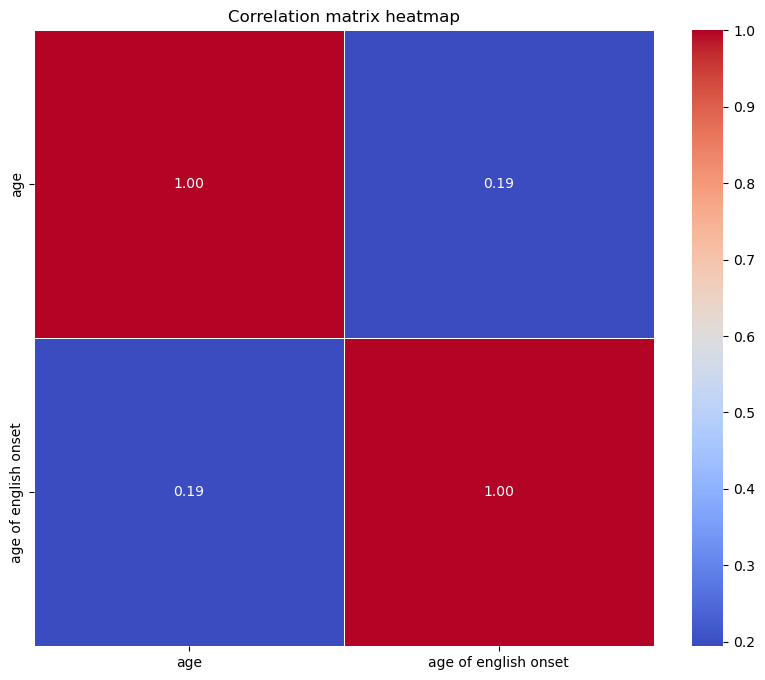

In [11]:
if len(num_var) < 21:
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation matrix heatmap')
    plt.show()
else :
    print("There are too many variables to visualize the Correlation matrix heatmap! ")

### <font color='MediumBlue'>2 - <ins> Analysing correlations</ins>: <font color='violet'></font>

In [12]:
high_corr_threshold = 0.8
highly_correlated_pairs = []

for i in range(len(correlations_matrix.columns)):
    for j in range(i):
        if abs(correlations_matrix.iloc[i, j]) > high_corr_threshold:
            col_pair = (correlations_matrix.columns[i], correlations_matrix.columns[j], correlations_matrix.iloc[i, j])
            highly_correlated_pairs.append(col_pair)

for pair in highly_correlated_pairs:
    print(f"Columns: {pair[0]} and {pair[1]} - Correlation: {pair[2]}")

In [14]:
def correlated_cols_to_del(df, num_vars, threshold=0.8):
    correlation_matrix = df[num_vars].corr()
    columns_to_del = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                columns_to_del.append(correlation_matrix.columns[j])
    return columns_to_del

cols_to_del = list(set(correlated_cols_to_del(df_saa_bios, num_var)))
print("Columns to delete where correlation is higher than 0.8 :")
print(*cols_to_del,sep="\n")

Columns to delete where correlation is higher than 0.8 :



### <font color='MediumBlue'>3 - <ins> Dimension Reduction</ins>: <font color='violet'></font>

<ins><strong>Removing columns: </strong></ins>

In [ ]:
num_var.remove('unnamed:_9')
df.drop(columns = 'unnamed:_9', inplace=True)
df.reset_index(inplace=True, drop=True)

num_var.remove('unnamed:_10')
df.drop(columns = 'unnamed:_10', inplace=True)
df.reset_index(inplace=True, drop=True)

In [15]:
df_saa_bios.describe()

,age,age of english onset
count,3031.00000,3031.000000
mean,32.58578,9.039921
std,14.18076,8.000767
min,0.00000,0.000000
25%,22.00000,3.000000
50%,27.00000,9.000000
75%,40.00000,13.000000
max,97.00000,86.000000
